In [1]:
from utils.data_preparation import prepare_dataset

train, val, test = prepare_dataset()

Loading of the train-clean-100 subset...
Loading of the train-clean-100 subset completed.
Volumes - Train: 0.6 | Val: 0.2 | Test: 0.2


In [4]:
from utils.visualize import Visualizer

viz = Visualizer()


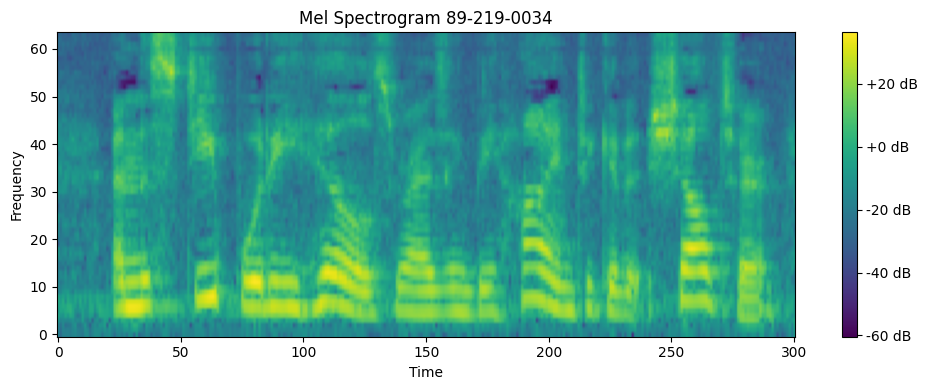

In [3]:
i = 0

feature, _ = train[i]

plot_label = train.get_path(i).split('\\')[-1].split('.')[0]
viz.visualize_features(feature, label=plot_label)

In [ ]:
from train import train_model

model, train_metrics, val_metrics, history, y_true, y_pred = train_model(train, val, epoch_details=False)
val_metrics

Using device: cpu
Loading of the train-clean-100 subset...
Loading of the train-clean-100 subset completed.
Volumes - Train: 0.6 | Val: 0.2 | Test: 0.2


Training: 100%|██████████| 20/20 [03:08<00:00,  9.43s/epoch]

Training completed.


{'accuracy': 0.7666666666666667,
 'precision': 0.7975,
 'recall': 0.7666666666666667,
 'f1': 0.7495454545454545}

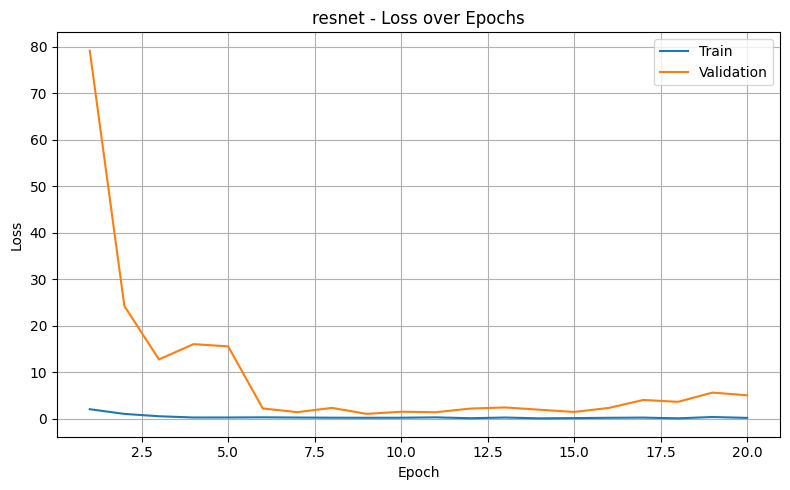

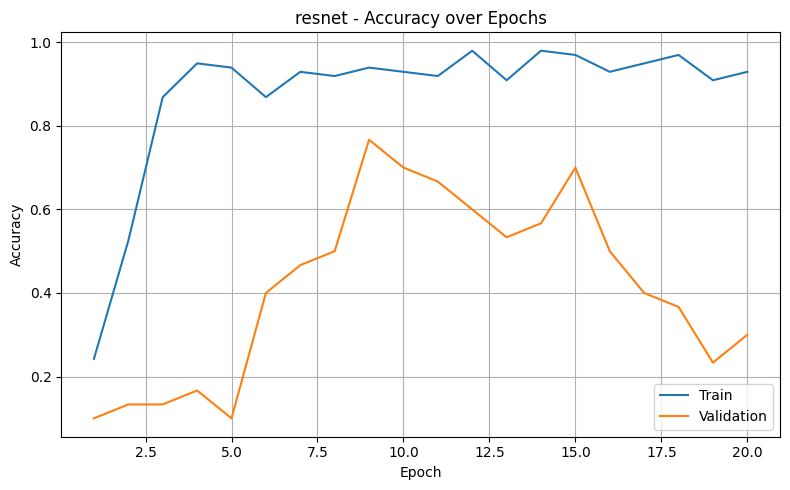

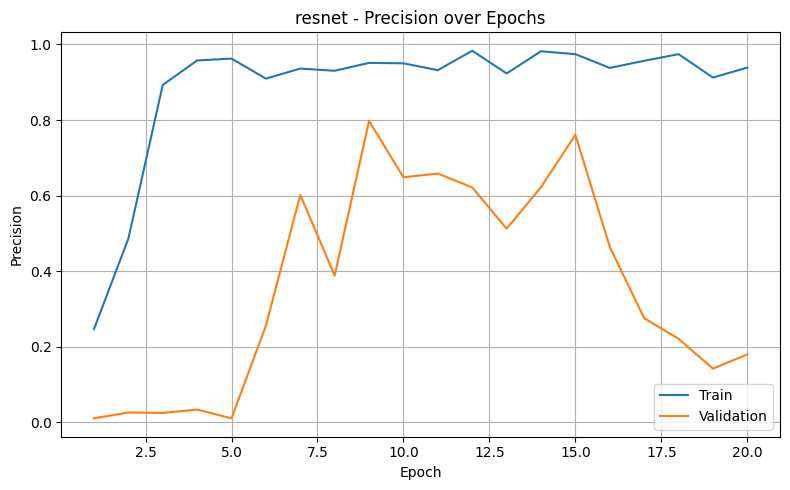

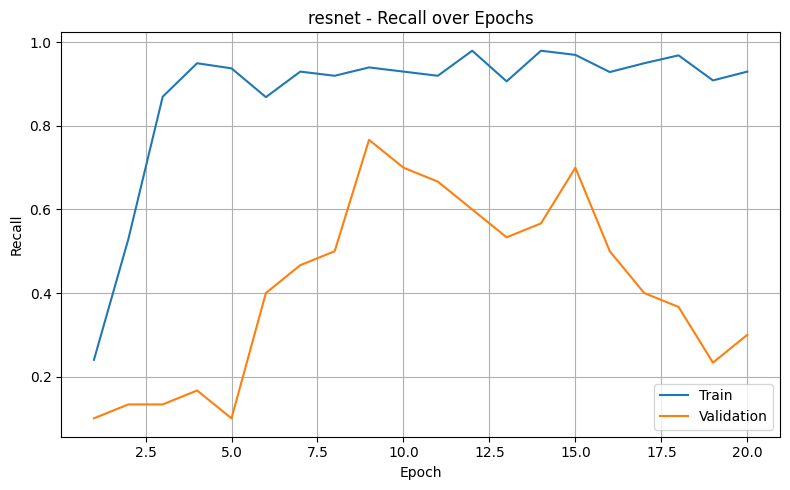

In [5]:
from config import config

viz.plot_training_history(history, metrics=["loss", "accuracy", "precision", "recall"], title_prefix=f"{config['model_type']} - ")

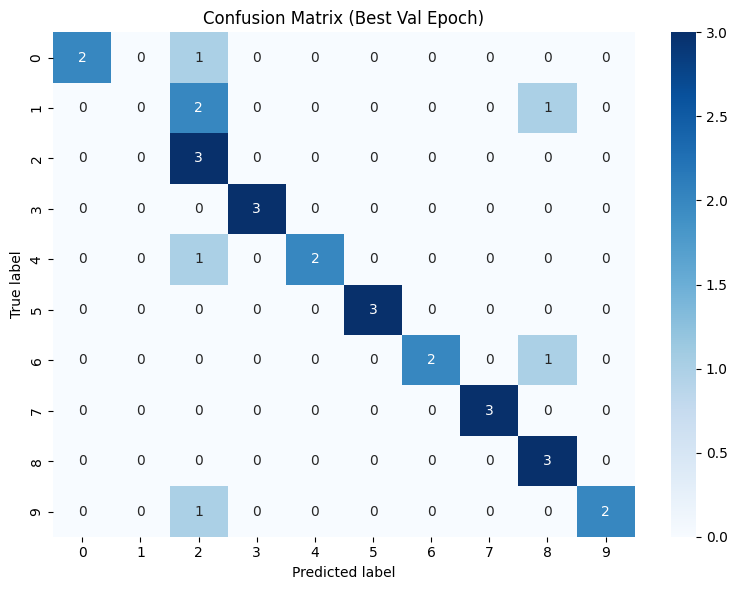

In [6]:
# Visualisation de la matrice de confusion
viz.plot_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    class_names=[str(i) for i in range(config['num_speakers'])],
    title="Confusion Matrix (Best Val Epoch)"
)

Loading of the train-clean-100 subset...
Loading of the train-clean-100 subset completed.
Volumes - Train: 0.6 | Val: 0.2 | Test: 0.2


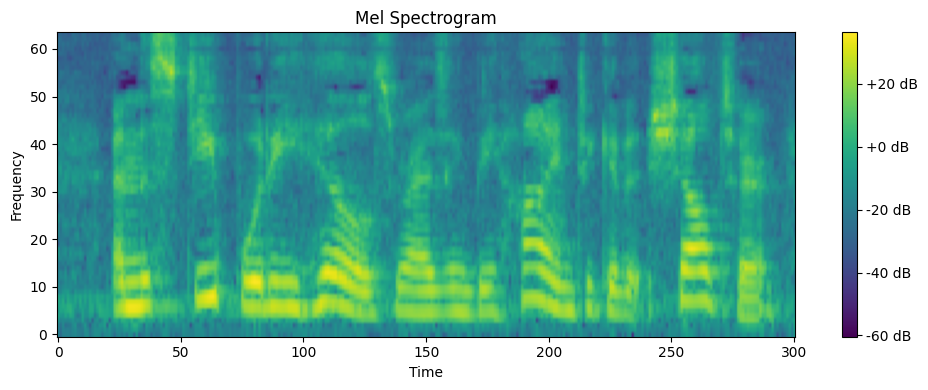

In [ ]:
from utils.data_preparation import generate_kfold_dataloaders
from utils.visualize import Visualizer
from config import config

folds = generate_kfold_dataloaders(k=config["k_folds"], batch_size=config["batch_size"])
train, val = folds[0]
feature, label = train[0]

viz = Visualizer()

viz.visualize_features(feature)



In [ ]:
from train import train_model
from evaluate import average_kfold_metrics

all_val_metrics = []

for i, (train_loader, val_loader) in enumerate(folds):
    print(f"\nFold {i + 1}/{3}")
    model, train_metrics, val_metrics, history, y_true, y_pred = train_model(
        train_set=train_loader,
        val_set=val_loader,
        epoch_details=False
    )
    all_val_metrics.append(val_metrics)

average_kfold_metrics(all_val_metrics)


Fold 1/3
Using device: cpu


Training: 100%|██████████| 20/20 [02:04<00:00,  6.21s/epoch]


Training completed.

Fold 2/3
Using device: cpu


Training:  45%|████▌     | 9/20 [00:59<01:13,  6.68s/epoch]